In [1]:
  import sys
  ! {sys.executable} -m pip freeze
  ! {sys.executable} -m pip --version

absl-py==0.5.0
adal==1.1.0
alabaster==0.7.10
alembic==1.0.0
anaconda-client==1.6.14
anaconda-project==0.8.2
appdirs==1.4.3
applicationinsights==0.11.6
asn1crypto==0.24.0
astor==0.7.1
astroid==1.6.3
astropy==3.0.2
async-generator==1.10
attrs==18.1.0
audioread==2.1.6
autovizwidget==0.12.5
azure==4.0.0
azure-applicationinsights==0.1.0
azure-batch==4.1.3
azure-common==1.1.15
azure-cosmosdb-nspkg==2.0.2
azure-cosmosdb-table==1.0.5
azure-datalake-store==0.0.31
azure-eventgrid==1.2.0
azure-graphrbac==0.40.0
azure-keyvault==1.1.0
azure-loganalytics==0.1.0
azure-mgmt==4.0.0
azure-mgmt-advisor==1.0.1
azure-mgmt-applicationinsights==0.1.1
azure-mgmt-authorization==0.50.0
azure-mgmt-batch==5.0.1
azure-mgmt-batchai==2.0.0
azure-mgmt-billing==0.2.0
azure-mgmt-cdn==3.0.0
azure-mgmt-cognitiveservices==3.0.0
azure-mgmt-commerce==1.0.1
azure-mgmt-compute==4.1.0
azure-mgmt-consumption==2.0.0
azure-mgmt-containerinstance==1.1.0
azure-mgmt-containerregistry==2.2.0
azure-mgmt-containerservice==4.2.2
azure-m

In [1]:
  import sys
  sys.version

'3.5.5 |Anaconda custom (64-bit)| (default, May 13 2018, 21:12:35) \n[GCC 7.2.0]'

# Custom vision

In [3]:
!pip install azure-cognitiveservices-vision-customvision

    100% |████████████████████████████████| 92kB 3.2MB/s ta 0:00:011
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.training.models import ImageUrlCreateEntry

# Replace with a valid key
training_key = "e67b9fbb864242a4b54f405f0b4dde58"
prediction_key = "13c783ec251e4a0da4346b37590af9f7"

trainer = training_api.TrainingApi(training_key)

# Create a new project
print ("Creating project...")
project = trainer.create_project("My Project")

Creating project...


In [7]:
project_id = "5005f3d9-f2e9-4d8f-88fb-bee7860b187e"

In [8]:
hardshell_tag = trainer.create_tag(project_id, "hard_shell")
insulated_tag = trainer.create_tag(project_id, "insulated")

In [9]:
import os
hardshell_dir = "./gear_images/hardshell_jackets/"
for image in os.listdir(os.fsencode(hardshell_dir)):
    with open(hardshell_dir + "/" + os.fsdecode(image), mode="rb") as img_data: 
        trainer.create_images_from_data(project_id, img_data, [ hardshell_tag.id ])

insulated_dir = "./gear_images/insulated_jackets/"
for image in os.listdir(os.fsencode(insulated_dir)):
    with open(insulated_dir + "/" + os.fsdecode(image), mode="rb") as img_data: 
        trainer.create_images_from_data(project_id, img_data, [ insulated_tag.id ])



In [10]:
import time

print ("Training...")
iteration = trainer.train_project(project_id)
while (iteration.status != "Completed"):
   iteration = trainer.get_iteration(project_id, iteration.id)
   print ("Training status: " + iteration.status)
   time.sleep(1)

# The iteration is now trained. Make it the default project endpoint
trainer.update_iteration(project_id, iteration.id, is_default=True)
print ("Done!")

Training...
Training status: Training
Training status: Training
Training status: Completed
Done!


In [12]:
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models

predictor = prediction_endpoint.PredictionEndpoint(prediction_key)

# Alternatively, if the images were on disk in a folder called Images alongside the sample.py, then
# they can be added by using the following.
#
# Open the sample image and get back the prediction results.
with open("./gear_images/hardshell_jackets/10184183x1012905_zm.jpeg", mode="rb") as test_data:
     results = predictor.predict_image(project_id, test_data, iteration.id)

# Display the results.
for prediction in results.predictions:
    print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))


	hard_shell: 99.98%
	insulated: 0.02%


In [ ]:
for prediction in results.predictions:
    print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))

In [15]:
!wget https://www.trekkinn.com/f/63/636185/the-north-face-quest-insulated.jpg

--2018-11-05 10:55:02--  https://www.trekkinn.com/f/63/636185/the-north-face-quest-insulated.jpg
Resolving www.trekkinn.com... 35.201.124.70
Connecting to www.trekkinn.com|35.201.124.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48216 (47K) [image/jpeg]
Saving to: ‘the-north-face-quest-insulated.jpg’

the-north-face-ques 100%[===================>]  47.09K  --.-KB/s    in 0.02s   

2018-11-05 10:55:03 (1.96 MB/s) - ‘the-north-face-quest-insulated.jpg’ saved [48216/48216]



In [17]:
predictor = prediction_endpoint.PredictionEndpoint(prediction_key)

# Alternatively, if the images were on disk in a folder called Images alongside the sample.py, then
# they can be added by using the following.
#
# Open the sample image and get back the prediction results.
with open("./the-north-face-quest-insulated.jpg", mode="rb") as test_data:
     results = predictor.predict_image(project_id, test_data, iteration.id)

# Display the results.
for prediction in results.predictions:
    print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))


	hard_shell: 92.49%
	insulated: 7.51%


# Data preprocessing

In [2]:
import numpy as np
from scipy import misc

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app


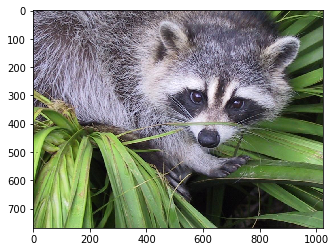

In [4]:
f = misc.face()
misc.imsave('face.png', f)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [ ]:
import matplotlib

In [5]:
import numpy as np
import PIL
I = np.asarray(PIL.Image.open('./gear_images/boots/10018755x1036824_zm.jpeg'))
I.shape

(400, 400, 3)

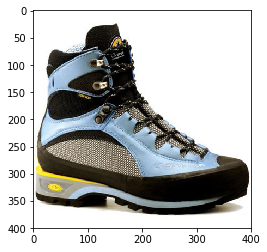

In [6]:
plt.imshow(I)
plt.show()

In [95]:
import numpy as np
from PIL import Image
def load_image(path_to_img):
   '''
       Load images and resize them if they are squared and not in 128x128x3
       Input:
           - path_to_img (string): local path to an image
       Output:
           - img (PIL.Image): Image in corrected size.
   '''
   img = Image.open(path_to_img)
   
   if(img.size[0] > img.size[1]):
       white = np.zeros((img.size[0] - img.size[1], img.size[0],  3)) + 255
       img = np.vstack((np.array(img)[:,:,:3], white))
   elif(img.size[0] < img.size[1]):
       white = np.zeros((img.size[1], img.size[1] - img.size[0], 3)) + 255
       img = np.hstack((np.array(img)[:,:,:3], white))
   
   img = (255 / np.max(np.abs(img))) * img
   img = img.astype(int)
   
   img = Image.fromarray(np.uint8(img))
   basewidth = 128
   wpercent = (basewidth/float(img.size[0]))
   hsize = int((float(img.size[1])*float(wpercent)))
   img = img.resize((basewidth,hsize), Image.ANTIALIAS)

   return img

In [250]:
import numpy as np
from PIL import Image
def load_image(path_to_img):
   '''
       Load images and resize them if they are squared and not in 128x128x3
       Input:
           - path_to_img (string): local path to an image
       Output:
           - img (PIL.Image): Image in corrected size.
   '''
   img = Image.open(path_to_img)
   #img = (255 / np.max(np.abs(img))) * img
   #max_ = np.percentile(img, 75)
   #min_ = np.percentile(img, 15)
   #img = np.clip(img, min_, max_)
   #img = img - min_
   #img = (255 / (max_ - min_)) * img
   #img = np.clip(img, 0, 255)

   #img = img.astype(int)
   img = Image.fromarray(np.uint8(img))
   
   if(img.size[0] > img.size[1]):
       white = np.zeros((img.size[0] - img.size[1], img.size[0],  3)) + 255
       img = np.vstack((np.array(img)[:,:,:3], white))
   elif(img.size[0] < img.size[1]):
       white = np.zeros((img.size[1], img.size[1] - img.size[0], 3)) + 255
       img = np.hstack((np.array(img)[:,:,:3], white))
   
   # img = (255 / np.max(np.abs(img))) * img
   # img = img.astype(int)
   
   img = Image.fromarray(np.uint8(img))
   basewidth = 128
   wpercent = (basewidth/float(img.size[0]))
   hsize = int((float(img.size[1])*float(wpercent)))
   img = img.resize((basewidth,hsize), Image.ANTIALIAS)

   return img

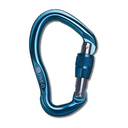

In [251]:
load_image("./gear_images/carabiners/10019160x1036971_zm.jpeg")
# load_image("gear_images/axes/10215531x1028317_zm.jpeg")

In [252]:
test = load_image("./gear_images/carabiners/10019160x1036971_zm.jpeg")

(array([  169.,     0.,     0., ...,     0.,     0., 36453.]),
 array([0.00000000e+00, 5.45921644e-02, 1.09184329e-01, ...,
        2.54890816e+02, 2.54945408e+02, 2.55000000e+02]),
 <a list of 4671 Patch objects>)

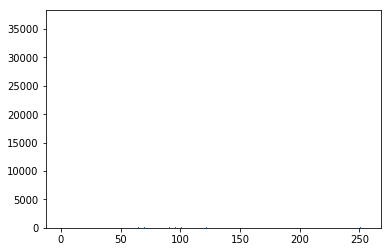

In [253]:
plt.hist(np.array(test).flatten(), bins='auto')

In [254]:
import os
for element_type in os.listdir('./gear_images/'):
    for pic in os.listdir('./gear_images/' + element_type):
        try:
            img = load_image('./gear_images/' + element_type +'/'+ pic)
            img.save('./resized_img/' + element_type + '/' + pic)
        except IsADirectoryError:
            print("Francois & Remi ont fait de la *****")

Francois & Remi ont fait de la *****


In [268]:
test = load_image("./rescaled_img/hardshell_jackets/10184183x1012905_zm.jpeg")
test = load_image("./resized_img/hardshell_jackets/10184183x1012905_zm.jpeg")

(array([1.887e+03, 1.724e+03, 1.825e+03, 2.005e+03, 1.759e+03, 1.881e+03,
        1.901e+03, 1.828e+03, 1.960e+03, 2.125e+03, 2.450e+03, 2.195e+03,
        2.195e+03, 1.929e+03, 1.657e+03, 1.276e+03, 4.290e+02, 1.220e+02,
        4.200e+01, 1.700e+01, 2.100e+01, 1.100e+01, 9.300e+01, 4.000e+02,
        1.742e+04]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. , 112.2, 122.4, 132.6, 142.8, 153. , 163.2, 173.4,
        183.6, 193.8, 204. , 214.2, 224.4, 234.6, 244.8, 255. ]),
 <a list of 25 Patch objects>)

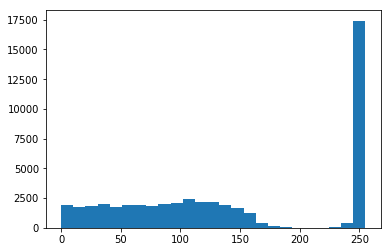

In [269]:
plt.hist(np.array(test).flatten(), bins='auto')

In [270]:
np.array(test).shape

(128, 128, 3)

(array([ 826.,  908.,  976.,  811.,  932.,  930., 1097., 1051.,  805.,
         732.,  746.,  468.,  100.,   14.,   11.,    7.,   80., 5890.]),
 array([  0.        ,  14.16666667,  28.33333333,  42.5       ,
         56.66666667,  70.83333333,  85.        ,  99.16666667,
        113.33333333, 127.5       , 141.66666667, 155.83333333,
        170.        , 184.16666667, 198.33333333, 212.5       ,
        226.66666667, 240.83333333, 255.        ]),
 <a list of 18 Patch objects>)

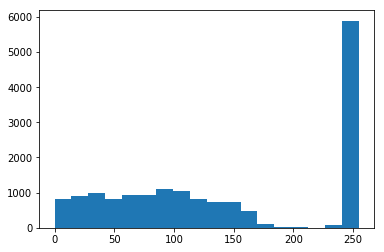

In [271]:
plt.hist(np.array(test)[:,:,0].flatten(), bins='auto')

(array([7.950e+02, 8.290e+02, 9.330e+02, 7.970e+02, 8.920e+02, 8.760e+02,
        1.073e+03, 1.103e+03, 9.460e+02, 9.120e+02, 7.960e+02, 3.520e+02,
        8.500e+01, 1.800e+01, 3.000e+00, 5.000e+00, 8.800e+01, 5.881e+03]),
 array([  0.        ,  14.16666667,  28.33333333,  42.5       ,
         56.66666667,  70.83333333,  85.        ,  99.16666667,
        113.33333333, 127.5       , 141.66666667, 155.83333333,
        170.        , 184.16666667, 198.33333333, 212.5       ,
        226.66666667, 240.83333333, 255.        ]),
 <a list of 18 Patch objects>)

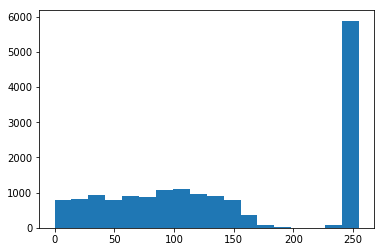

In [272]:
plt.hist(np.array(test)[:,:,1].flatten(), bins='auto')

(array([ 913.,  787.,  861.,  768.,  759.,  777.,  872., 1013., 1288.,
        1213.,  735.,  320.,   79.,   14.,    8.,    8.,  110., 5859.]),
 array([  0.        ,  14.16666667,  28.33333333,  42.5       ,
         56.66666667,  70.83333333,  85.        ,  99.16666667,
        113.33333333, 127.5       , 141.66666667, 155.83333333,
        170.        , 184.16666667, 198.33333333, 212.5       ,
        226.66666667, 240.83333333, 255.        ]),
 <a list of 18 Patch objects>)

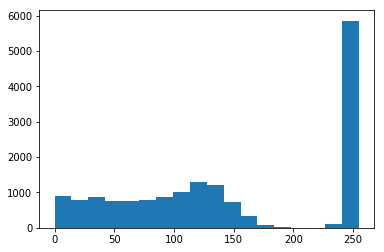

In [273]:
plt.hist(np.array(test)[:,:,2].flatten(), bins='auto')

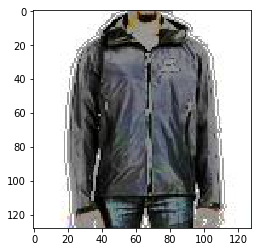

In [274]:
plt.imshow(test)
plt.show()

In [244]:
import cv2

In [245]:
img = load_image('./resized_img/hardshell_jackets/10184183x1012905_zm.jpeg')
hist,bins = np.histogram(np.array(img).flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

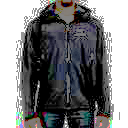

In [246]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
Image.fromarray(img2)

In [261]:
import numpy as np
from PIL import Image
def change_dynamic_image(path_to_img):
    '''
       Load images and resize them if they are squared and not in 128x128x3
       Input:
           - path_to_img (string): local path to an image
       Output:
           - img (PIL.Image): Image in corrected size.
    '''
    img = cv2.imread(path_to_img, 0)
    hist,bins = np.histogram(np.array(img).flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[img]
    img2 = Image.fromarray(img2)

    return img2

In [262]:
import os
for element_type in os.listdir('./resized_img/'):
    for pic in os.listdir('./resized_img/' + element_type):
        try:
            img = change_dynamic_image('./resized_img/' + element_type +'/'+ pic)
            img.save('./rescaled_img/' + element_type + '/' + pic)
        except IsADirectoryError:
            print("Francois & Remi ont fait de la *****")

In [276]:
import sklearn
import pandas as pd
import os
from PIL import Image
import numpy as np

In [289]:
labels = []
list_imgs = []
for element_type in os.listdir('./rescaled_img/'):
    for pic in os.listdir('./rescaled_img/' + element_type):
        try:
            img = Image.open('./rescaled_img/' + element_type + '/' + pic)
            img = np.array(img).flatten()
            labels.append(element_type)
            list_imgs.append(img.tolist())
        except IsADirectoryError:
            print(".ipynb_checkpoints error")

In [290]:
type(list_imgs[0])

list

In [291]:
np.array(list_imgs[0:1])

array([[252, 255, 255, ..., 255, 255, 255]])

In [292]:
np.array(list_imgs)

array([[252, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [293]:
img = Image.open('./resized_img//harnesses/10213720x1036902_zm.jpeg')
img = np.array(img).flatten()
print(img.shape)

(49152,)


In [294]:
img = Image.open('resized_img//harnesses/1313485_408_main.png')
img = np.array(img).flatten()
print(img.shape)

(65536,)
